# **Overview**

**Problem** :     
Home Credit faces challenges in accurately predicting credit scores, leading to the rejection of creditworthy customers and the approval of high-risk borrowers, resulting in lost revenue and increased default rates. Additionally, the current loan structuring (principal, maturity, and repayment schedule) is not fully optimized to enhance repayment success, and the lack of explainability in credit decisions reduces customer trust and regulatory compliance.

**Goal** : Enhance the accuracy of credit scoring predictions to ensure that creditworthy customers are not rejected and to optimize loan structuring (principal, maturity, and repayment calendar) to increase the likelihood of successful loan repayment.

**Objectives** :
* Build and evaluate Machine Learning models to predict the likelihood of customers repaying their loans.
* Identify the most significant features affecting customers’ repayment capabilities.
* Recommend the best approach to determining principal, maturity, and repayment schedules to motivate successful loan repayment.

**Metrics** :     
* Accuracy Score
* Precision & Recall
* F1 Score

**Core Business Questions to Address**
* How can we improve the accuracy of our credit scoring model to reduce false rejections?
* What loan structuring strategies (principal, maturity, repayment calendar) can be optimized to increase repayment rates?
* Which features or customer behaviors are the strongest indicators of loan repayment?

# **Data Preparation**

Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

Load Dataset

In [2]:
data_test = pd.read_csv('application_test.csv')
data_train = pd.read_csv('application_train.csv')

In [3]:
data_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data_test.shape

(48744, 121)

In [6]:
data_train.shape

(307511, 122)

In [7]:
data_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DAYS

In [8]:
data_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [9]:
data_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [10]:
data_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


# **Data Pre-Processing**

## **Drop Irrelevant Column**

In [11]:
def drop_columns(data):
    columns_to_drop = [
        col for col in data.columns if col.endswith('AVG') or
        col in ['APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
                'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE',
                'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE'
                'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE'] or
        col in ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT'] or
        col in ['DAYS_ID_PUBLISH']
    ]
    return data.drop(columns=columns_to_drop)

data_test = drop_columns(data_test)
data_train = drop_columns(data_train)

## **Check Duplicate Data**

In [12]:
print("Total Duplicate Data Application Test :", data_test.duplicated().sum())
print("Total Duplicate Data Application Test :", data_train.duplicated().sum())

Total Duplicate Data Application Test : 0
Total Duplicate Data Application Test : 0


## **Check Missing Values**

In [13]:
print("Total Missing Values Data Application Test :", data_test.isnull().sum().sum())
print("Total Missing Values Data Application Train :", data_train.isnull().sum().sum())

Total Missing Values Data Application Test : 653968
Total Missing Values Data Application Train : 4277259


In [14]:
def missing_values(df):
    missing_summary = pd.DataFrame(df.isnull().sum(), columns=['Total Missing Values'])
    missing_summary['Percentage'] = (missing_summary['Total Missing Values'] / df.shape[0]) * 100
    missing_summary['Percentage'] = missing_summary['Percentage'].round(2).astype(str) + '%'
    missing_summary = missing_summary.sort_values(by=['Total Missing Values'], ascending=False).reset_index()
    return missing_summary

In [15]:
data_train_missing = missing_values(data_train)
print("Application Train Missing Values Distribution")
data_train_missing

Application Train Missing Values Distribution


,index,Total Missing Values,Percentage
0,COMMONAREA_MEDI,214865,69.87%
1,NONLIVINGAPARTMENTS_MEDI,213514,69.43%
2,FONDKAPREMONT_MODE,210295,68.39%
3,LIVINGAPARTMENTS_MEDI,210199,68.35%
4,LIVINGAPARTMENTS_MODE,210199,68.35%
...,...,...,...
85,NAME_EDUCATION_TYPE,0,0.0%
86,NAME_INCOME_TYPE,0,0.0%
87,AMT_CREDIT,0,0.0%
88,FLAG_PHONE,0,0.0%


In [16]:
data_test_missing = missing_values(data_test)
print("Application Test Missing Values Distribution")
data_test_missing

Application Test Missing Values Distribution


,index,Total Missing Values,Percentage
0,COMMONAREA_MEDI,33495,68.72%
1,NONLIVINGAPARTMENTS_MEDI,33347,68.41%
2,FONDKAPREMONT_MODE,32797,67.28%
3,LIVINGAPARTMENTS_MODE,32780,67.25%
4,LIVINGAPARTMENTS_MEDI,32780,67.25%
...,...,...,...
84,NAME_FAMILY_STATUS,0,0.0%
85,NAME_EDUCATION_TYPE,0,0.0%
86,NAME_INCOME_TYPE,0,0.0%
87,AMT_GOODS_PRICE,0,0.0%


In [17]:
def plot_missing_values(data):
    missing_values = data.isnull().sum()
    missing_values = missing_values[missing_values > 0].sort_values()

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x=missing_values.values, y=missing_values.index, color="salmon")

    for index, value in enumerate(missing_values.values):
        ax.text(value + 5000, index, str(value), va='center', fontsize=10)

    plt.title("Missing Values Count Per Column", fontsize=14)
    plt.xlabel("Number of Missing Values", fontsize=12)
    plt.ylabel("Columns", fontsize=12)
    plt.show()

Application Train Missing Values Distribution


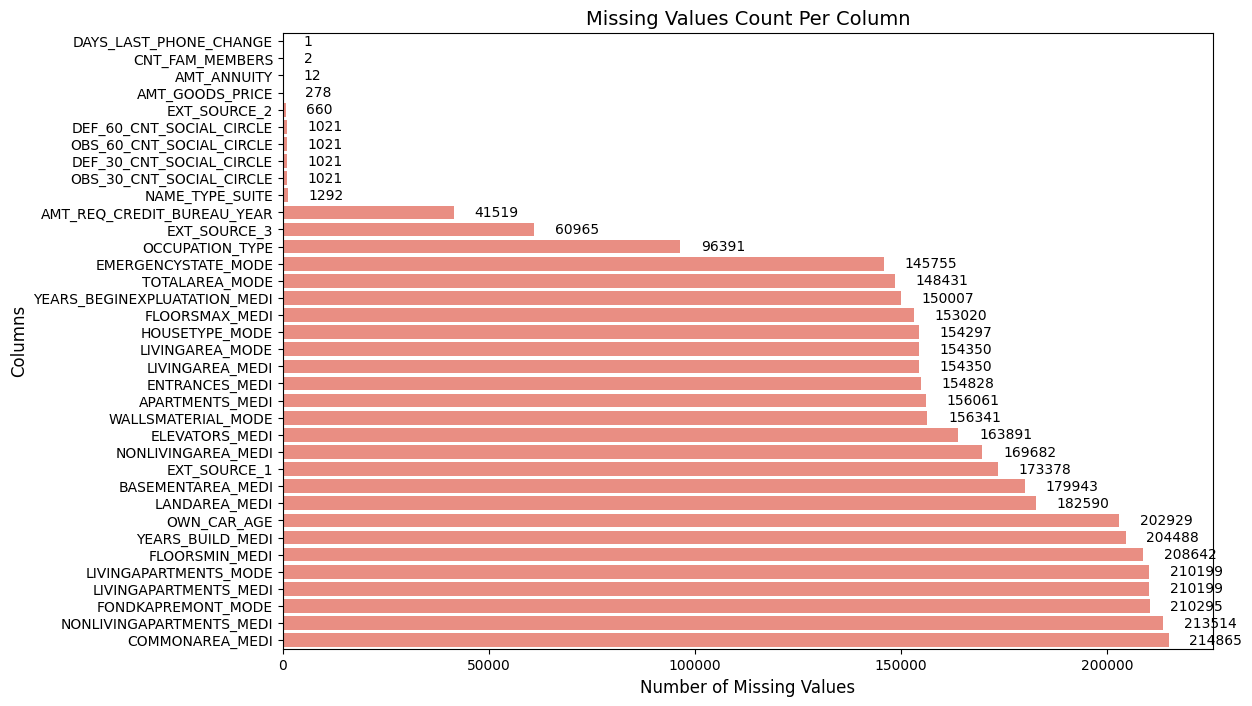

In [18]:
print("Application Train Missing Values Distribution")
plot_missing_values(data_train)

Application Test Missing Values Distribution


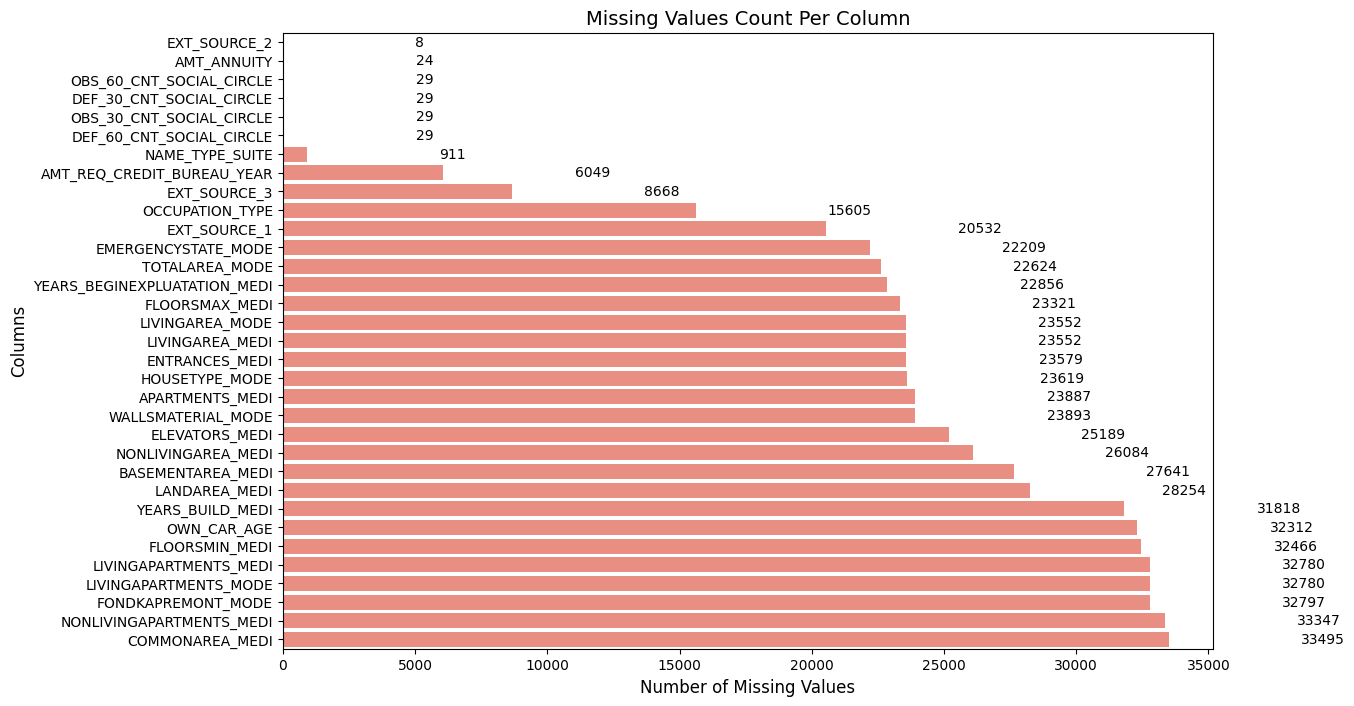

In [19]:
print("Application Test Missing Values Distribution")
plot_missing_values(data_test)

## **Handling Missing Values**

In [20]:
def imputasi_data(data):
    numeric_columns = data.select_dtypes(include=['number']).columns
    data[numeric_columns] = data[numeric_columns].apply(lambda col: col.fillna(col.median()), axis=0)
    categorical_columns = data.select_dtypes(include=['object']).columns
    data[categorical_columns] = data[categorical_columns].apply(lambda col: col.fillna('Not Identified'))
    return data

In [21]:
data_test_imputed = imputasi_data(data_test)
data_train_imputed = imputasi_data(data_train)

In [22]:
print("Total Missing Values Data Application Test :", data_test.isnull().sum().sum())
print("Total Missing Values Data Application Train :", data_train.isnull().sum().sum())

Total Missing Values Data Application Test : 0
Total Missing Values Data Application Train : 0


## **Categorical Data Manipulation**

Check Unique Data Categorical

In [23]:
data_train['CODE_GENDER'].value_counts()

,count
CODE_GENDER,
F,202448
M,105059
XNA,4


In [24]:
data_train['FLAG_OWN_CAR'].value_counts()

,count
FLAG_OWN_CAR,
N,202924
Y,104587


In [25]:
data_train['FLAG_OWN_REALTY'].value_counts()

,count
FLAG_OWN_REALTY,
Y,213312
N,94199


In [26]:
data_train['NAME_TYPE_SUITE'].value_counts()

,count
NAME_TYPE_SUITE,
Unaccompanied,248526
Family,40149
"Spouse, partner",11370
Children,3267
Other_B,1770
Not Identified,1292
Other_A,866
Group of people,271


In [27]:
data_train['NAME_INCOME_TYPE'].value_counts()

,count
NAME_INCOME_TYPE,
Working,158774
Commercial associate,71617
Pensioner,55362
State servant,21703
Unemployed,22
Student,18
Businessman,10
Maternity leave,5


In [28]:
data_train['NAME_EDUCATION_TYPE'].value_counts()

,count
NAME_EDUCATION_TYPE,
Secondary / secondary special,218391
Higher education,74863
Incomplete higher,10277
Lower secondary,3816
Academic degree,164


In [29]:
data_train['NAME_FAMILY_STATUS'].value_counts()

,count
NAME_FAMILY_STATUS,
Married,196432
Single / not married,45444
Civil marriage,29775
Separated,19770
Widow,16088
Unknown,2


In [30]:
data_train['OCCUPATION_TYPE'].value_counts()

,count
OCCUPATION_TYPE,
Not Identified,96391
Laborers,55186
Sales staff,32102
Core staff,27570
Managers,21371
Drivers,18603
High skill tech staff,11380
Accountants,9813
Medicine staff,8537


In [31]:
data_train['ORGANIZATION_TYPE'].value_counts()

,count
ORGANIZATION_TYPE,
Business Entity Type 3,67992
XNA,55374
Self-employed,38412
Other,16683
Medicine,11193
Business Entity Type 2,10553
Government,10404
School,8893
Trade: type 7,7831


In [32]:
data_train['FONDKAPREMONT_MODE'].value_counts()

,count
FONDKAPREMONT_MODE,
Not Identified,210295
reg oper account,73830
reg oper spec account,12080
not specified,5687
org spec account,5619


In [33]:
data_train['HOUSETYPE_MODE'].value_counts()

,count
HOUSETYPE_MODE,
Not Identified,154297
block of flats,150503
specific housing,1499
terraced house,1212


In [34]:
data_train['WALLSMATERIAL_MODE'].value_counts()

,count
WALLSMATERIAL_MODE,
Not Identified,156341
Panel,66040
"Stone, brick",64815
Block,9253
Wooden,5362
Mixed,2296
Monolithic,1779
Others,1625


 Categorical Simplification

In [35]:
def simplify_suite(name):
    if name == "Unaccompanied":
        return "Alone"
    elif name in ["Family", "Spouse, partner", "Children"]:
        return "Family"
    else:
        return "Other Groups"

In [36]:
data_train["NAME_TYPE_SUITE"] = data_train["NAME_TYPE_SUITE"].apply(simplify_suite)
data_test["NAME_TYPE_SUITE"] = data_test["NAME_TYPE_SUITE"].apply(simplify_suite)

In [37]:
data_train['NAME_TYPE_SUITE'].value_counts()

,count
NAME_TYPE_SUITE,
Alone,248526
Family,54786
Other Groups,4199


For Column 'NAME_INCOME_TYPE'

In [38]:
def simplify_income(name):
    if name == "Student":
        return "Student"
    elif name in ["Working", "Commercial associate", "State servant", "Businessman"]:
        return "Active Workers"
    elif name in ["Unemployed"]:
        return "Unemployed"
    elif name in ["Maternity leave"]:
        return "Maternity Leave"
    else:
        return "Retire"

In [39]:
data_train["NAME_INCOME_TYPE"] = data_train["NAME_INCOME_TYPE"].apply(simplify_income)
data_test["NAME_INCOME_TYPE"] = data_test["NAME_INCOME_TYPE"].apply(simplify_income)

In [40]:
data_train['NAME_INCOME_TYPE'].value_counts()

,count
NAME_INCOME_TYPE,
Active Workers,252104
Retire,55362
Unemployed,22
Student,18
Maternity Leave,5


For Column 'NAME_FAMILY_STATUS'

In [41]:
def simplify_status(name):
    if name == "Single / not married":
        return "Single"
    elif name in ["Separated", "Widow"]:
        return "Previously Married"
    elif name in ["Married", "Civil marriage"]:
        return "Married"
    else:
        return "Unknown"

In [42]:
data_train["NAME_FAMILY_STATUS"] = data_train["NAME_FAMILY_STATUS"].apply(simplify_status)
data_test["NAME_FAMILY_STATUS"] = data_test["NAME_FAMILY_STATUS"].apply(simplify_status)

In [43]:
data_train['NAME_FAMILY_STATUS'].value_counts()

,count
NAME_FAMILY_STATUS,
Married,226207
Single,45444
Previously Married,35858
Unknown,2


For Column 'ORGANIZATION_TYPE'

In [44]:
replace_organization = {
    r'Industry.*': 'Industry',
    r'Trade.*': 'Trade',
    r'Transport.*': 'Transport',
    r'Business Entity.*': 'Business Entity'
}

for pattern, replacement in replace_organization.items():
    data_train['ORGANIZATION_TYPE'] = data_train['ORGANIZATION_TYPE'].str.replace(pattern, replacement, regex=True)
    data_test['ORGANIZATION_TYPE'] = data_test['ORGANIZATION_TYPE'].str.replace(pattern, replacement, regex=True)

In [45]:
data_train['ORGANIZATION_TYPE'].value_counts()

,count
ORGANIZATION_TYPE,
Business Entity,84529
XNA,55374
Self-employed,38412
Other,16683
Trade,14315
Industry,14311
Medicine,11193
Government,10404
Transport,8990


## **Binning**

Check Range Values

In [46]:
min_values = data_train[['AMT_INCOME_TOTAL', 'AMT_CREDIT']].min()
max_values = data_train[['AMT_INCOME_TOTAL', 'AMT_CREDIT']].max()

print("Nilai minimum:\n", min_values)
print("Nilai maksimum:\n", max_values)

Nilai minimum:
 AMT_INCOME_TOTAL    25650.0
AMT_CREDIT          45000.0
dtype: float64
Nilai maksimum:
 AMT_INCOME_TOTAL    117000000.0
AMT_CREDIT            4050000.0
dtype: float64


Binning Column AMT_INCOME_TOTAL & AMT_CREDIT

In [47]:
def bin_data(df, column_name, num_bins=5, labels=None):
    quantiles = df[column_name].quantile([i / num_bins for i in range(num_bins + 1)]).tolist()
    df[f'{column_name}_BINNED'] = pd.cut(df[column_name], bins=quantiles, labels=labels, include_lowest=True)
    return df

In [48]:
data_test = bin_data(data_test, 'AMT_INCOME_TOTAL', num_bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
print(data_test[['AMT_INCOME_TOTAL', 'AMT_INCOME_TOTAL_BINNED']].head())

   AMT_INCOME_TOTAL AMT_INCOME_TOTAL_BINNED
0          135000.0                     Low
1           99000.0                Very Low
2          202500.0                    High
3          315000.0               Very High
4          180000.0                  Medium


In [49]:
data_test['AMT_INCOME_TOTAL_BINNED'].value_counts()

,count
AMT_INCOME_TOTAL_BINNED,
Very Low,13455
Medium,11097
Very High,8680
High,8038
Low,7474


In [50]:
data_train = bin_data(data_train, 'AMT_INCOME_TOTAL', num_bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
print(data_train[['AMT_INCOME_TOTAL', 'AMT_INCOME_TOTAL_BINNED']].head())

   AMT_INCOME_TOTAL AMT_INCOME_TOTAL_BINNED
0          202500.0                    High
1          270000.0               Very High
2           67500.0                Very Low
3          135000.0                     Low
4          121500.0                     Low


In [51]:
data_train['AMT_INCOME_TOTAL_BINNED'].value_counts()

,count
AMT_INCOME_TOTAL_BINNED,
Low,85756
High,75513
Very Low,63671
Very High,47118
Medium,35453


In [52]:
data_test = bin_data(data_test, 'AMT_CREDIT', num_bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
print(data_test[['AMT_CREDIT', 'AMT_CREDIT_BINNED']].head())

   AMT_CREDIT AMT_CREDIT_BINNED
0    568800.0              High
1    222768.0          Very Low
2    663264.0              High
3   1575000.0         Very High
4    625500.0              High


In [53]:
data_test['AMT_CREDIT_BINNED'].value_counts()

,count
AMT_CREDIT_BINNED,
High,9947
Very Low,9885
Medium,9828
Low,9620
Very High,9464


In [54]:
data_train = bin_data(data_train, 'AMT_CREDIT', num_bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
print(data_train[['AMT_CREDIT', 'AMT_CREDIT_BINNED']].head())

   AMT_CREDIT AMT_CREDIT_BINNED
0    406597.5               Low
1   1293502.5         Very High
2    135000.0          Very Low
3    312682.5               Low
4    513000.0            Medium


In [55]:
data_train['AMT_CREDIT_BINNED'].value_counts()

,count
AMT_CREDIT_BINNED,
Very Low,64925
High,64024
Medium,61552
Very High,58912
Low,58098


## **Min-Max Scaler**

Drop Column Before Binning

In [56]:
data_train_copy = data_train.copy()
data_test_copy = data_test.copy()

In [57]:
def drop_after_bin(data):
    columns_to_drop = [
        col for col in data.columns if col in ['AMT_INCOME_TOTAL', 'AMT_CREDIT']
    ]
    return data.drop(columns=columns_to_drop)

data_train_copy = drop_after_bin(data_train_copy)
data_test_copy = drop_after_bin(data_test_copy)

Min-Max Scaling

In [58]:
def min_max_scale(df):
    numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
    scaler = MinMaxScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    return df

In [59]:
data_train_scaled = min_max_scale(data_train_copy)
data_test_scaled = min_max_scale(data_test_copy)

In [60]:
data_train_scaled.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_BINNED,AMT_CREDIT_BINNED
0,0.000000,1.0,Cash loans,M,N,Y,0.0,0.090032,0.077441,Alone,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,High,Low
1,0.000003,0.0,Cash loans,F,N,N,0.0,0.132924,0.271605,Family,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,Very High,Very High
2,0.000006,0.0,Revolving loans,M,Y,Y,0.0,0.020025,0.023569,Alone,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,Very Low,Very Low
3,0.000011,0.0,Cash loans,F,N,Y,0.0,0.109477,0.063973,Alone,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,Low,Low
4,0.000014,0.0,Cash loans,M,N,Y,0.0,0.078975,0.117845,Alone,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,Low,Medium


In [61]:
data_test_scaled.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_BINNED,AMT_CREDIT_BINNED
0,0.000000,Cash loans,F,N,Y,0.00,0.102453,0.184049,Alone,Active Workers,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Low,High
1,0.000011,Cash loans,M,N,Y,0.00,0.084558,0.061350,Alone,Active Workers,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176471,Very Low,Very Low
2,0.000034,Cash loans,M,Y,Y,0.00,0.378515,0.265849,Other Groups,Active Workers,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.235294,High,High
3,0.000076,Cash loans,F,N,Y,0.10,0.262078,0.695297,Alone,Active Workers,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176471,Very High,Very High
4,0.000104,Cash loans,M,Y,N,0.05,0.166995,0.263804,Alone,Active Workers,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117647,Medium,High


## **Label Encoding**

In [62]:
def label_encode(df):
    le = LabelEncoder()
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype == 'category':
            df[col] = le.fit_transform(df[col])
    return df

In [63]:
data_train_encoded = label_encode(data_train_scaled)
data_train_encoded.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_BINNED,AMT_CREDIT_BINNED
0,0.000000,1.0,0,1,0,1,0.0,0.090032,0.077441,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0,1
1,0.000003,0.0,0,0,0,0,0.0,0.132924,0.271605,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3,3
2,0.000006,0.0,1,1,1,1,0.0,0.020025,0.023569,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4,4
3,0.000011,0.0,0,0,0,1,0.0,0.109477,0.063973,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,1,1
4,0.000014,0.0,0,1,0,1,0.0,0.078975,0.117845,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,2


In [64]:
data_test_encoded = label_encode(data_test_scaled)
data_test_encoded.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_BINNED,AMT_CREDIT_BINNED
0,0.000000,0,0,0,1,0.00,0.102453,0.184049,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0
1,0.000011,0,1,0,1,0.00,0.084558,0.061350,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176471,4,4
2,0.000034,0,1,1,1,0.00,0.378515,0.265849,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.235294,0,0
3,0.000076,0,0,0,1,0.10,0.262078,0.695297,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176471,3,3
4,0.000104,0,1,1,0,0.05,0.166995,0.263804,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117647,2,0


# **Exploratory Data Analysis**

In [65]:
data_train_encoded.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_BINNED,AMT_CREDIT_BINNED
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.500146,0.080729,0.095213,0.341669,0.340108,0.693673,0.021950,0.099423,0.124159,0.205469,...,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.071139,1.797334,2.008507
std,0.288531,0.272419,0.293509,0.474297,0.473746,0.460968,0.038006,0.056525,0.092103,0.436534,...,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.070621,1.483741,1.434492
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058143,0.049383,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,1.000000,1.000000
50%,0.500206,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.090821,0.102132,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,1.000000,2.000000
75%,0.749862,0.000000,0.000000,1.000000,1.000000,1.000000,0.052632,0.128624,0.159371,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,3.000000,3.000000
max,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [66]:
data_train_encoded.corr()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_BINNED,AMT_CREDIT_BINNED
SK_ID_CURR,1.000000,-0.002108,0.001654,-0.000769,0.001216,0.000703,-0.001129,-0.000431,-0.000258,0.000867,...,0.002604,-0.000724,0.001450,0.000509,0.000167,0.001073,0.000282,0.004071,-0.001617,-0.002338
TARGET,-0.002108,1.000000,-0.030896,0.054692,-0.021851,-0.006148,0.019187,-0.012815,-0.039623,-0.007377,...,-0.006536,-0.011615,-0.003378,-0.007952,-0.001358,0.000215,0.003709,0.012161,-0.007883,-0.021812
NAME_CONTRACT_TYPE,0.001654,-0.030896,1.000000,-0.008613,0.004022,0.067177,0.029998,-0.241541,-0.185711,-0.003323,...,-0.007783,-0.023433,-0.000548,-0.007530,-0.005190,-0.007308,0.055821,-0.049643,0.030712,0.116672
CODE_GENDER,-0.000769,0.054692,-0.008613,1.000000,0.345833,-0.044340,0.047403,0.076960,0.022495,-0.006581,...,0.020888,0.000061,0.003772,0.022205,0.004632,0.003258,0.023908,-0.020651,-0.099362,-0.007379
FLAG_OWN_CAR,0.001216,-0.021851,0.004022,0.345833,1.000000,-0.002817,0.102023,0.141587,0.120435,0.005560,...,0.045909,0.001984,-0.002476,-0.000097,0.002184,0.007299,0.006741,-0.026124,-0.078327,-0.019752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FLAG_DOCUMENT_20,0.001073,0.000215,-0.007308,0.003258,0.007299,-0.025130,0.000988,0.011718,0.031644,0.000644,...,0.028299,0.082229,0.026167,0.081589,0.034981,1.000000,0.007480,-0.010424,-0.000816,-0.000335
FLAG_DOCUMENT_21,0.000282,0.003709,0.055821,0.023908,0.006741,-0.000173,-0.002450,-0.017598,-0.014426,-0.000066,...,-0.000637,0.003544,-0.000299,0.006259,-0.000447,0.007480,1.000000,-0.005253,-0.003728,0.017855
AMT_REQ_CREDIT_BUREAU_YEAR,0.004071,0.012161,-0.049643,-0.020651,-0.026124,0.058687,-0.034874,-0.008286,-0.038979,-0.029546,...,-0.016670,-0.042964,-0.008780,-0.042442,-0.006001,-0.010424,-0.005253,1.000000,-0.049015,-0.006585
AMT_INCOME_TOTAL_BINNED,-0.001617,-0.007883,0.030712,-0.099362,-0.078327,-0.004032,-0.010257,-0.128793,-0.108735,0.010690,...,-0.003191,-0.012783,-0.000454,0.001774,-0.002508,-0.000816,-0.003728,-0.049015,1.000000,0.106657


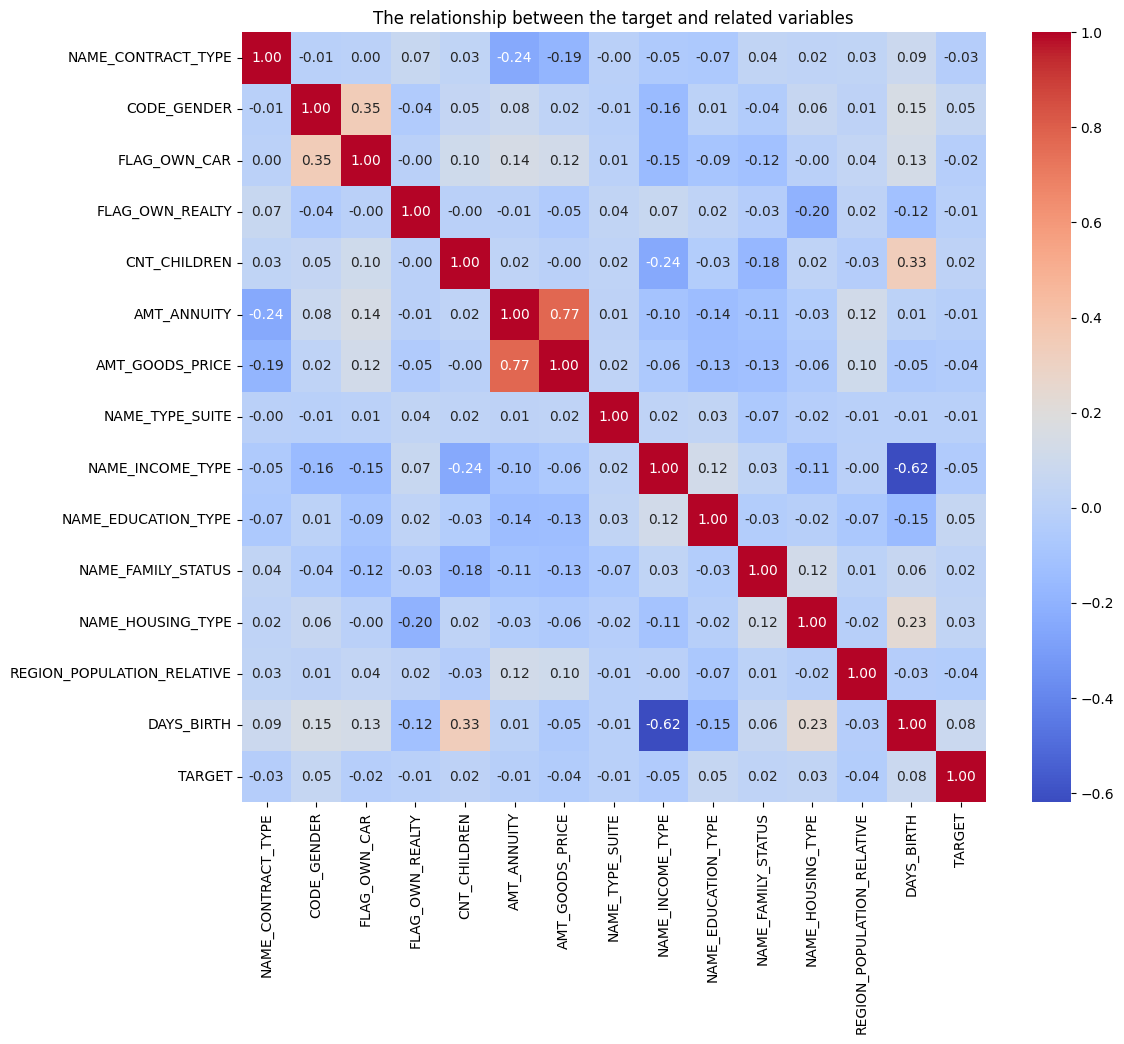

In [67]:
heatmap_data = data_train_encoded.iloc[:, 2:16]
heatmap_data['TARGET'] = data_train_encoded['TARGET']
correlation_matrix = heatmap_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('The relationship between the target and related variables')
plt.show()

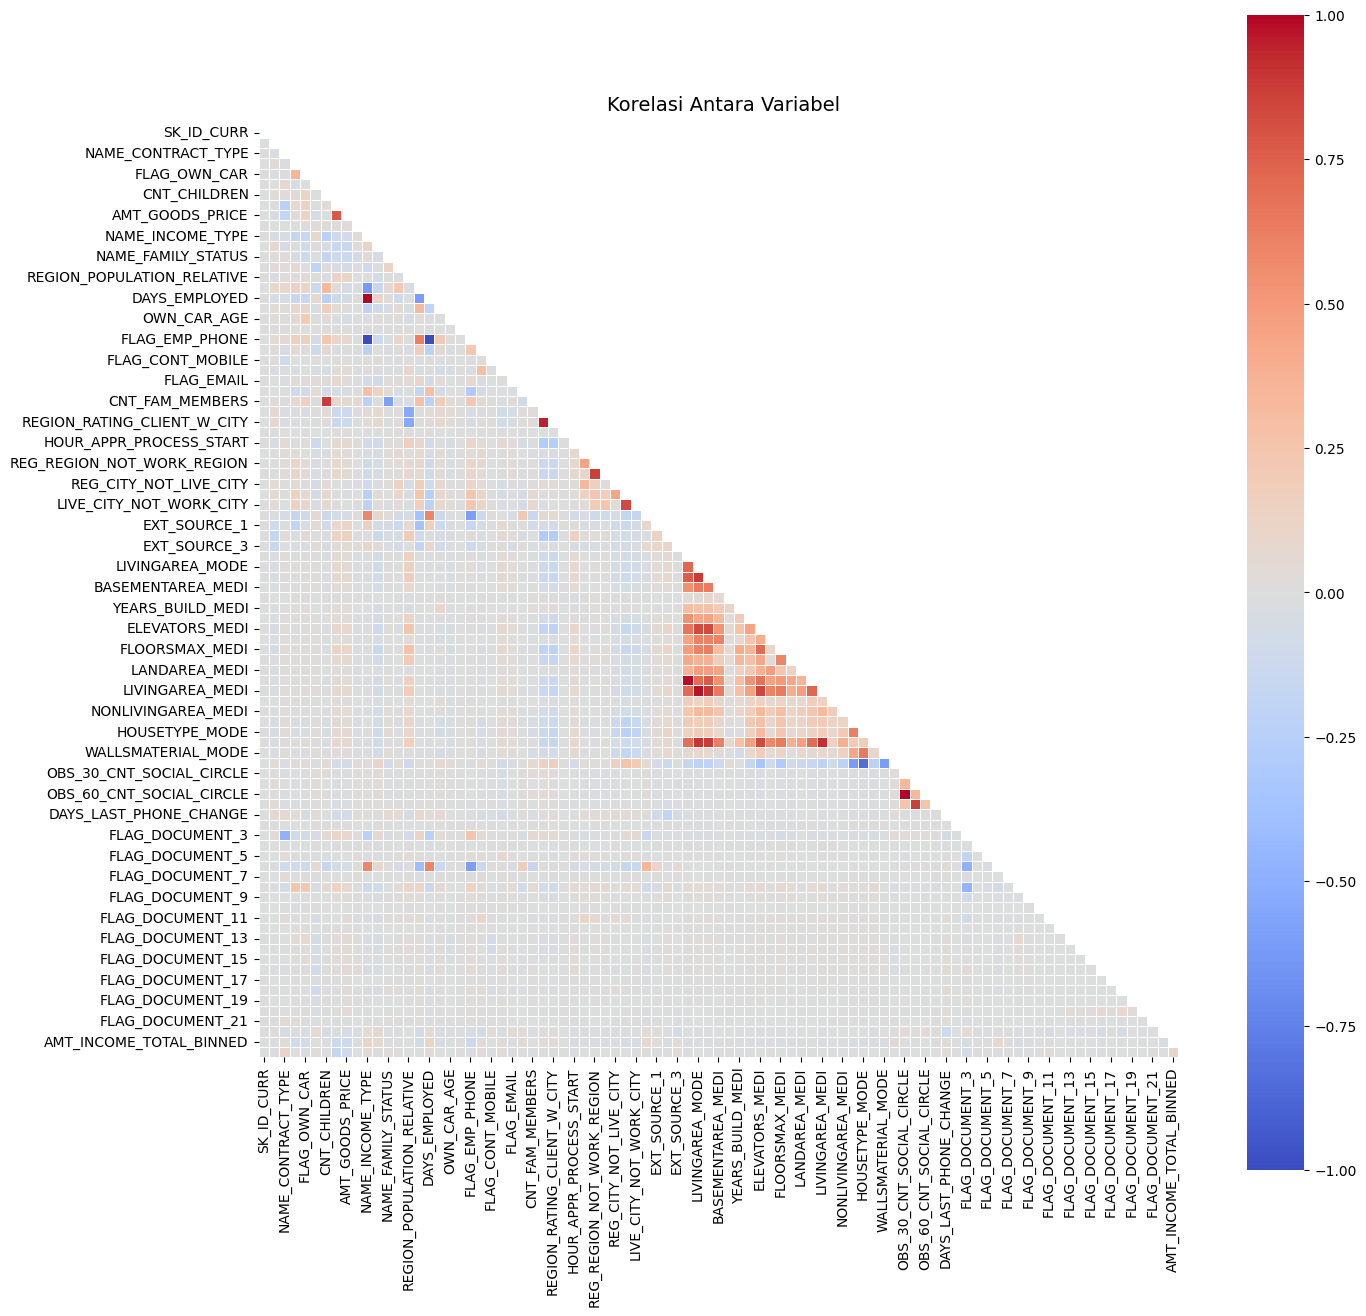

In [68]:
corr = data_train_encoded.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap='coolwarm', linewidths=0.5, square=True)
heatmap.set_title('Korelasi Antara Variabel', fontdict={'fontsize': 14}, pad=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

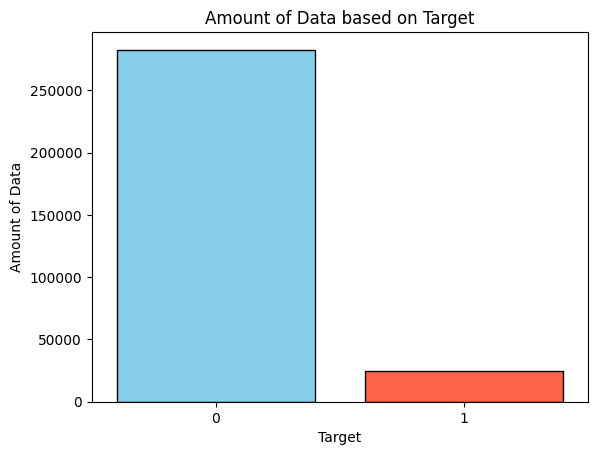

In [69]:
count_target = data_train['TARGET'].value_counts()
data_train['TARGET'] = data_train['TARGET'].astype('category')
plt.bar(data_train['TARGET'].cat.categories, count_target.values, edgecolor='black', color=['skyblue', 'tomato'])
plt.xticks([0, 1], ['0', '1'])
plt.xlim([-0.5, 1.5])
plt.title('Amount of Data based on Target')
plt.xlabel('Target')
plt.ylabel('Amount of Data')
plt.show()

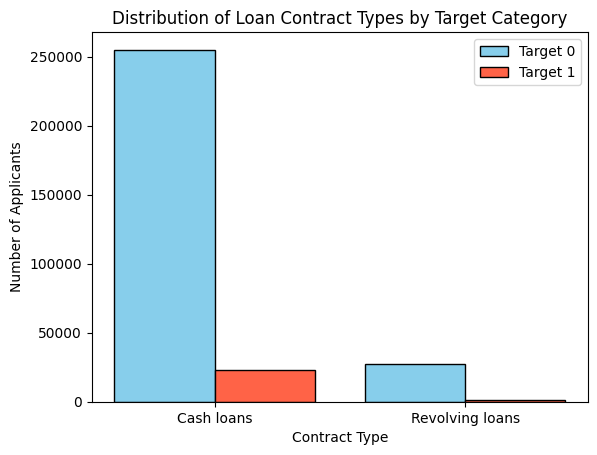

In [70]:
contract_target_counts = data_train.groupby(['NAME_CONTRACT_TYPE', 'TARGET'], observed=False).size().unstack()
contract_types = contract_target_counts.index
target_categories = contract_target_counts.columns
bar_width = 0.4
pos1 = range(len(contract_types))
pos2 = [x + bar_width for x in pos1]
plt.bar(pos1, contract_target_counts[0], color='skyblue', width=bar_width, edgecolor='black', label='Target 0')
plt.bar(pos2, contract_target_counts[1], color='tomato', width=bar_width, edgecolor='black', label='Target 1')
plt.title('Distribution of Loan Contract Types by Target Category')
plt.xlabel('Contract Type')
plt.ylabel('Number of Applicants')
plt.xticks([p + bar_width / 2 for p in range(len(contract_types))], contract_types)
plt.legend()
plt.show()

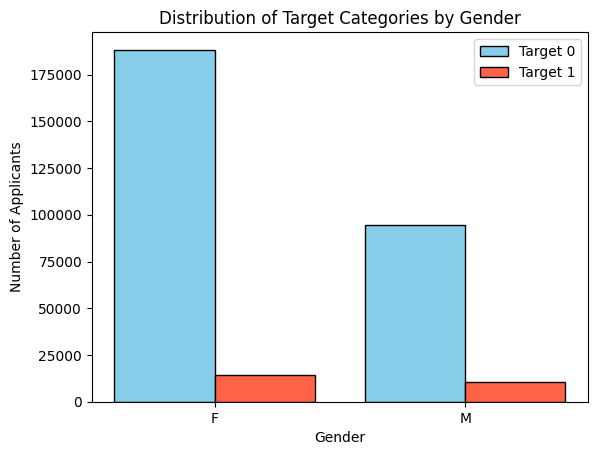

In [71]:
gender_target_counts = data_train.groupby(['CODE_GENDER', 'TARGET'], observed=False).size().unstack()
genders = ['F', 'M']
target_categories = gender_target_counts.columns
bar_width = 0.4
pos1 = range(len(genders))
pos2 = [x + bar_width for x in pos1]
plt.bar(pos1, gender_target_counts.loc[genders, 0], color='skyblue', width=bar_width, edgecolor='black', label='Target 0')
plt.bar(pos2, gender_target_counts.loc[genders, 1], color='tomato', width=bar_width, edgecolor='black', label='Target 1')
plt.title('Distribution of Target Categories by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Applicants')
plt.xticks([p + bar_width/2 for p in range(len(genders))], genders)
plt.legend()
plt.show()

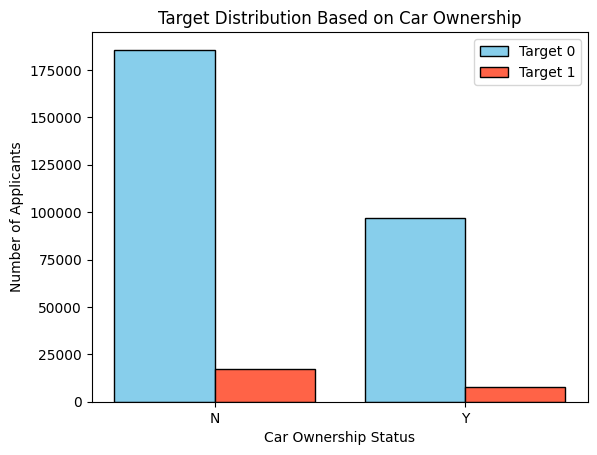

In [72]:
car_ownership_target_counts = data_train.groupby(['FLAG_OWN_CAR', 'TARGET'], observed=False).size().unstack()
car_ownership = car_ownership_target_counts.index
target_categories = car_ownership_target_counts.columns
bar_width = 0.4
pos1 = range(len(car_ownership))
pos2 = [x + bar_width for x in pos1]
plt.bar(pos1, car_ownership_target_counts[0], color='skyblue', width=bar_width, edgecolor='black', label='Target 0')
plt.bar(pos2, car_ownership_target_counts[1], color='tomato', width=bar_width, edgecolor='black', label='Target 1')
plt.title('Target Distribution Based on Car Ownership')
plt.xlabel('Car Ownership Status')
plt.ylabel('Number of Applicants')
plt.xticks([p + bar_width/2 for p in range(len(car_ownership))], car_ownership)
plt.legend()
plt.show()


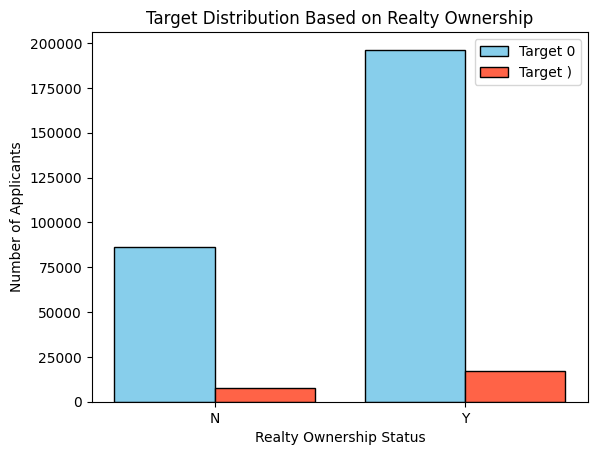

In [73]:
realty_ownership_target_counts = data_train.groupby(['FLAG_OWN_REALTY', 'TARGET'], observed=False).size().unstack()
realty_ownership = realty_ownership_target_counts.index
target_categories = realty_ownership_target_counts.columns
bar_width = 0.4
pos1 = range(len(car_ownership))
pos2 = [x + bar_width for x in pos1]
plt.bar(pos1, realty_ownership_target_counts[0], color='skyblue', width=bar_width, edgecolor='black', label='Target 0')
plt.bar(pos2, realty_ownership_target_counts[1], color='tomato', width=bar_width, edgecolor='black', label='Target )')
plt.title('Target Distribution Based on Realty Ownership')
plt.xlabel('Realty Ownership Status')
plt.ylabel('Number of Applicants')
plt.xticks([p + bar_width/2 for p in range(len(realty_ownership))], realty_ownership)
plt.legend()
plt.show()

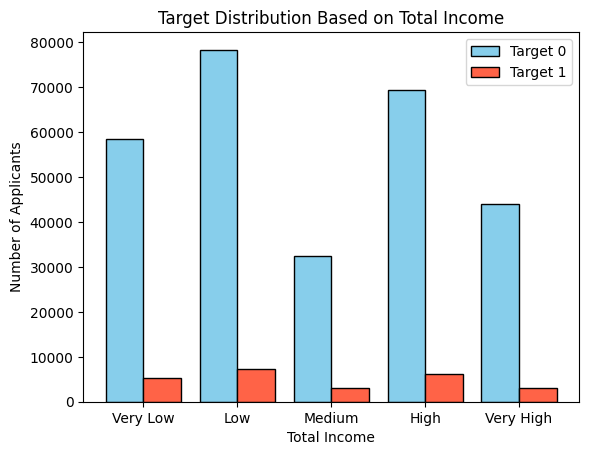

In [74]:
income_target_counts = data_train.groupby(['AMT_INCOME_TOTAL_BINNED', 'TARGET'], observed=False).size().unstack()
income = income_target_counts.index
target_categories = income_target_counts.columns
bar_width = 0.4
pos1 = range(len(income))
pos2 = [x + bar_width for x in pos1]
plt.bar(pos1, income_target_counts[0], color='skyblue', width=bar_width, edgecolor='black', label='Target 0')
plt.bar(pos2, income_target_counts[1], color='tomato', width=bar_width, edgecolor='black', label='Target 1')
plt.title('Target Distribution Based on Total Income')
plt.xlabel('Total Income')
plt.ylabel('Number of Applicants')
plt.xticks([p + bar_width/2 for p in range(len(income))], income)
plt.legend()
plt.show()

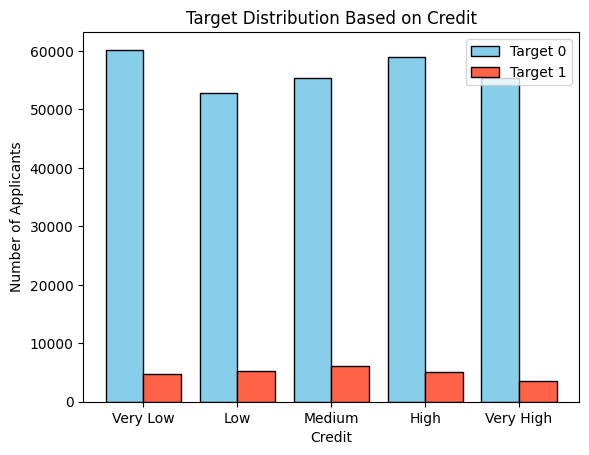

In [75]:
credit_target_counts = data_train.groupby(['AMT_CREDIT_BINNED', 'TARGET'], observed=False).size().unstack()
credit = credit_target_counts.index
target_categories = credit_target_counts.columns
bar_width = 0.4
pos1 = range(len(credit))
pos2 = [x + bar_width for x in pos1]
plt.bar(pos1, credit_target_counts[0], color='skyblue', width=bar_width, edgecolor='black', label='Target 0')
plt.bar(pos2, credit_target_counts[1], color='tomato', width=bar_width, edgecolor='black', label='Target 1')
plt.title('Target Distribution Based on Credit')
plt.xlabel('Credit')
plt.ylabel('Number of Applicants')
plt.xticks([p + bar_width/2 for p in range(len(credit))], credit)
plt.legend()
plt.show()

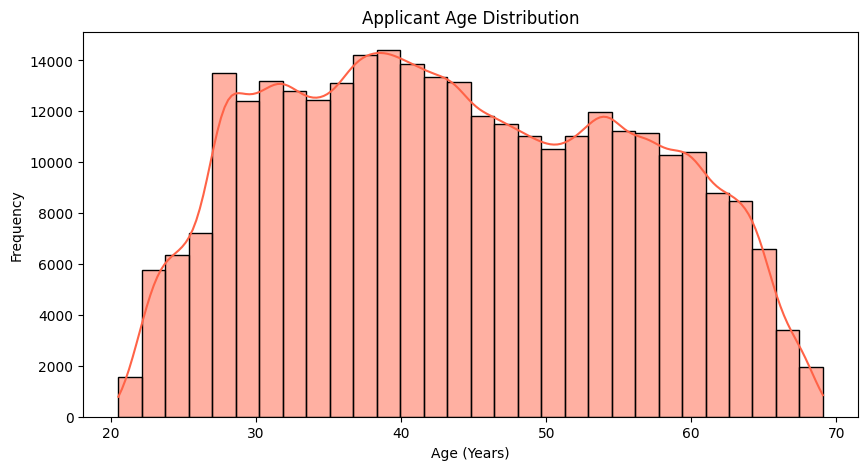

In [76]:
plt.figure(figsize=(10, 5))
data_train['AGE_YEARS'] = -data_train['DAYS_BIRTH'] / 365.25
sns.histplot(data_train["AGE_YEARS"], bins=30, kde=True, color="tomato")
plt.title("Applicant Age Distribution")
plt.xlabel("Age (Years)")
plt.ylabel("Frequency")
plt.show()

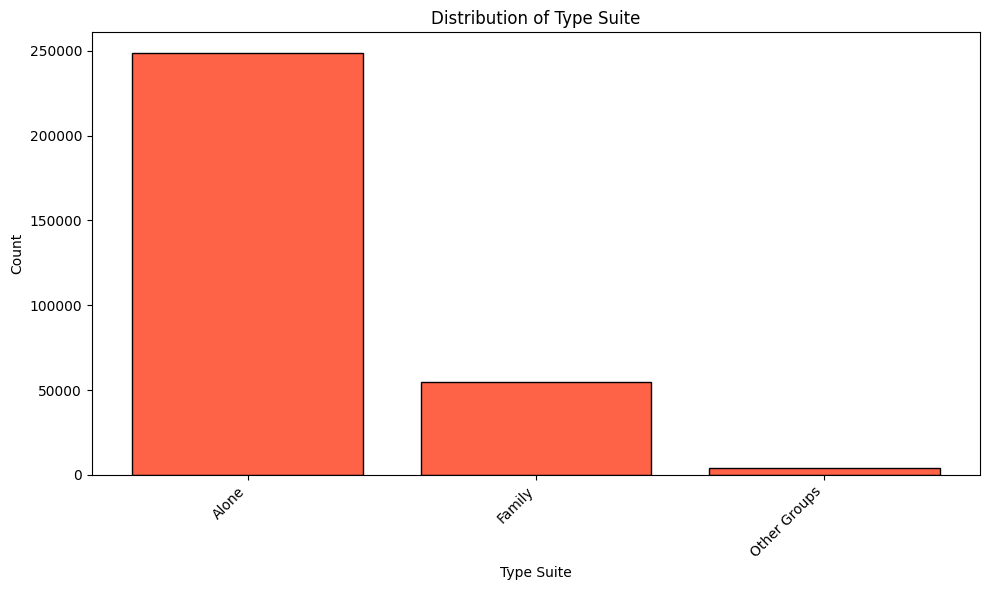

In [77]:
count_suite = data_train['NAME_TYPE_SUITE'].value_counts()
count_suite = count_suite.sort_values(ascending=False)
type_suite = count_suite
plt.figure(figsize=(10, 6))
plt.bar(type_suite.index, type_suite.values, edgecolor='black', color='tomato')
plt.title('Distribution of Type Suite')
plt.xlabel('Type Suite')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

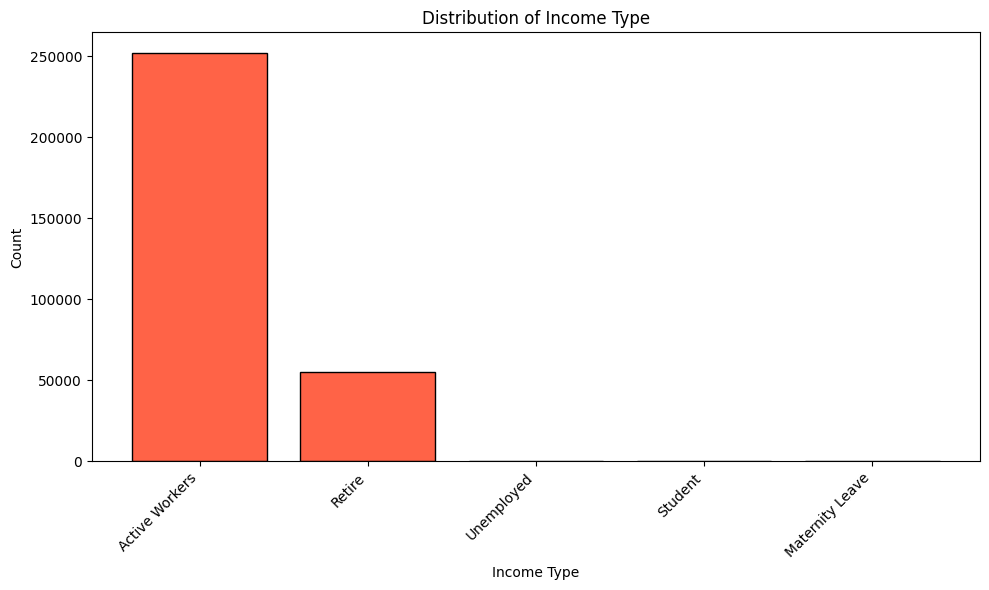

In [78]:
count_income_type = data_train['NAME_INCOME_TYPE'].value_counts()
count_income_type = count_income_type.sort_values(ascending=False)
income_type = count_income_type
plt.figure(figsize=(10, 6))
plt.bar(income_type.index, income_type.values, edgecolor='black', color='tomato')
plt.title('Distribution of Income Type')
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

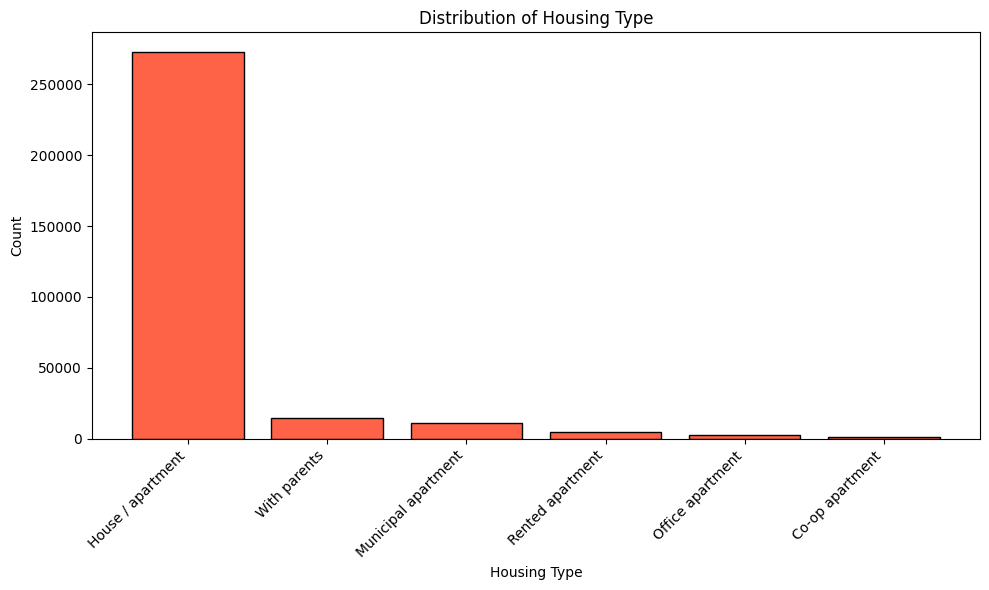

In [79]:
count_housing = data_train['NAME_HOUSING_TYPE'].value_counts()
count_housing = count_housing.sort_values(ascending=False)
housing_type = count_housing
plt.figure(figsize=(10, 6))
plt.bar(housing_type.index, housing_type.values, edgecolor='black', color='tomato')
plt.title('Distribution of Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

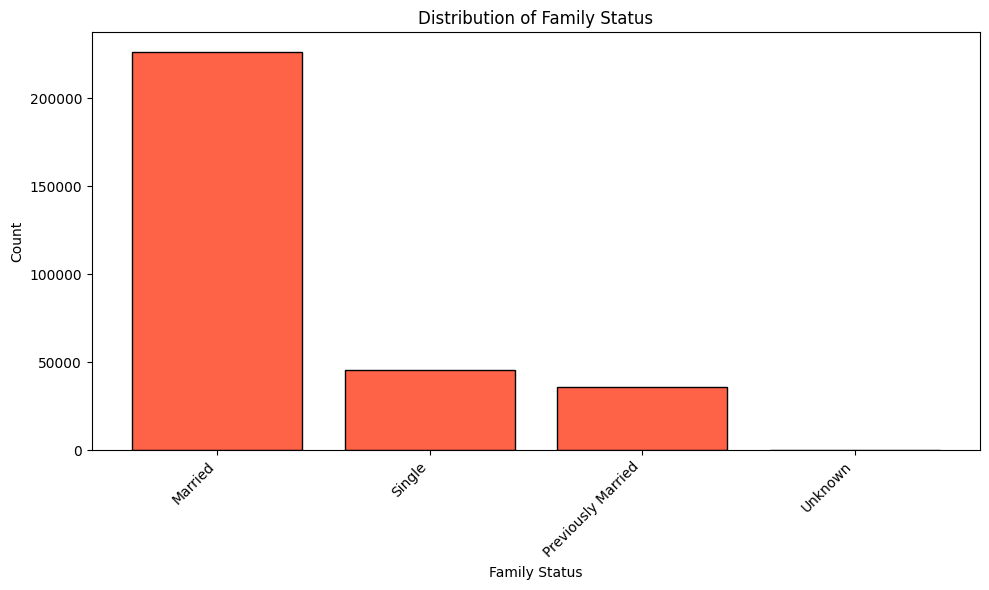

In [80]:
count_family = data_train['NAME_FAMILY_STATUS'].value_counts()
count_family = count_family.sort_values(ascending=False)
family_status = count_family
plt.figure(figsize=(10, 6))
plt.bar(family_status.index, family_status.values, edgecolor='black', color='tomato')
plt.title('Distribution of Family Status')
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

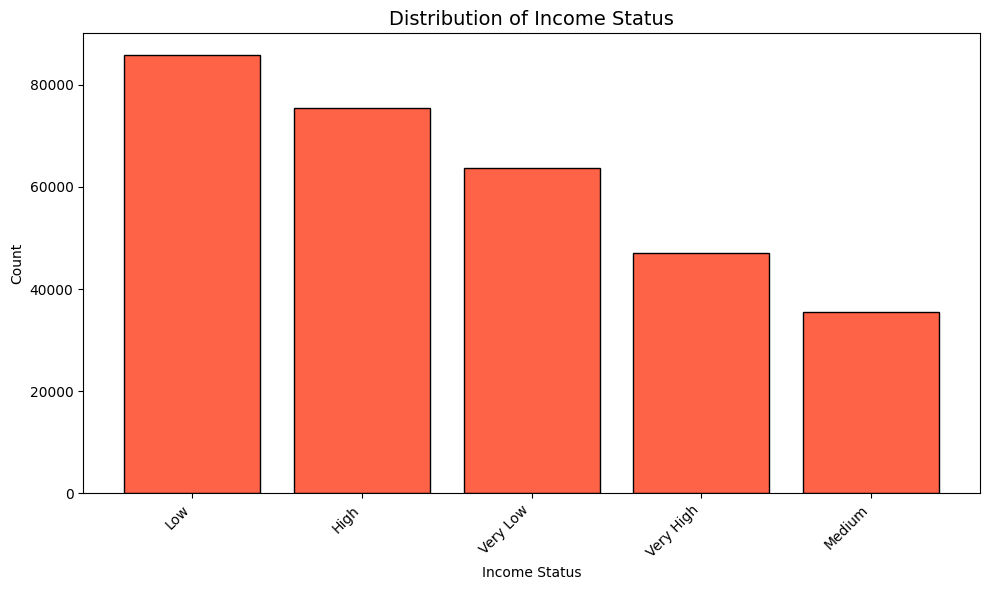

In [81]:
count_income = data_train['AMT_INCOME_TOTAL_BINNED'].value_counts()
count_income = count_income.sort_values(ascending=False)
income_status = count_income
plt.figure(figsize=(10, 6))
plt.bar(income_status.index, income_status.values, edgecolor='black', color='tomato')
plt.title('Distribution of Income Status', fontsize=14)
plt.xlabel('Income Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

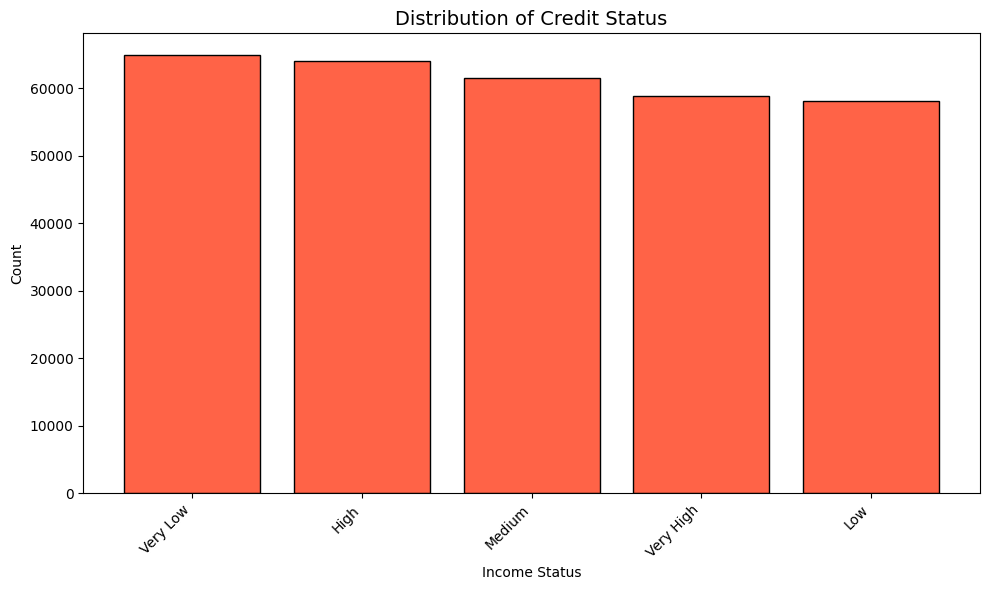

In [82]:
count_credit = data_train['AMT_CREDIT_BINNED'].value_counts()
count_credit = count_credit.sort_values(ascending=False)
credit_status = count_credit
plt.figure(figsize=(10, 6))
plt.bar(credit_status.index, credit_status.values, edgecolor='black', color='tomato')
plt.title('Distribution of Credit Status', fontsize=14)
plt.xlabel('Income Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

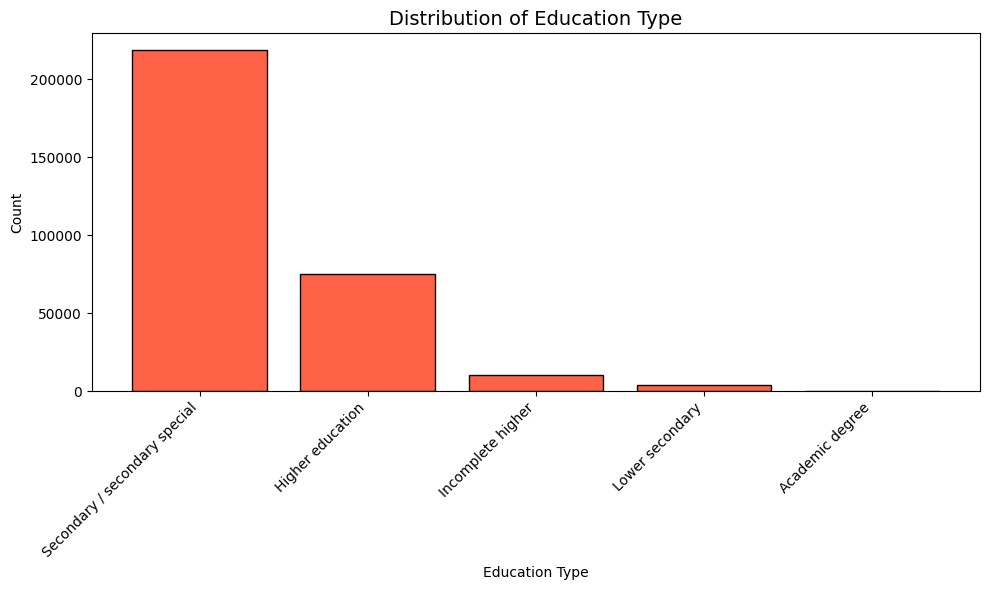

In [83]:
count_education = data_train['NAME_EDUCATION_TYPE'].value_counts()
count_education = count_education.sort_values(ascending=False)
education_type = count_education
plt.figure(figsize=(10, 6))
plt.bar(education_type.index, education_type.values, edgecolor='black', color='tomato')
plt.title('Distribution of Education Type', fontsize=14)
plt.xlabel('Education Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

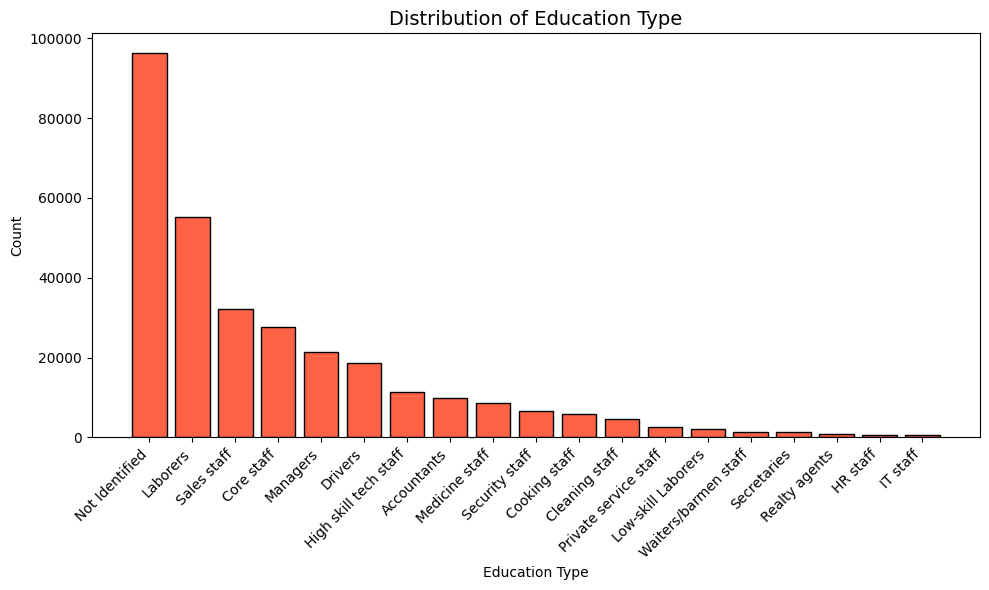

In [84]:
count_occupation = data_train['OCCUPATION_TYPE'].value_counts()
count_occupation = count_occupation.sort_values(ascending=False)
occupation_type = count_occupation
plt.figure(figsize=(10, 6))
plt.bar(occupation_type.index, occupation_type.values, edgecolor='black', color='tomato')
plt.title('Distribution of Education Type', fontsize=14)
plt.xlabel('Education Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

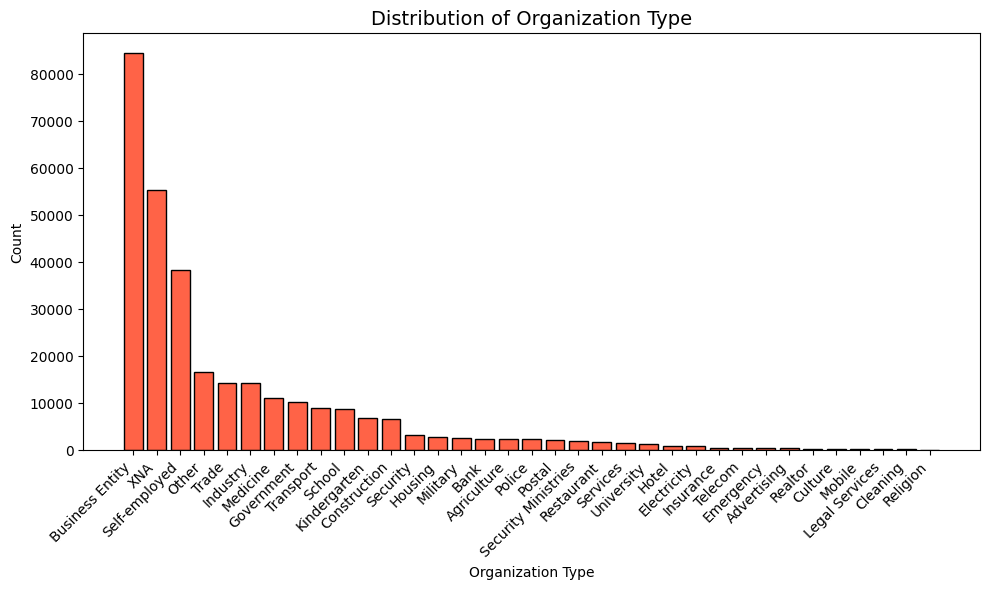

In [85]:
count_organization = data_train['ORGANIZATION_TYPE'].value_counts()
count_organization = count_organization.sort_values(ascending=False)
organization_type = count_organization
plt.figure(figsize=(10, 6))
plt.bar(organization_type.index, organization_type.values, edgecolor='black', color='tomato')
plt.title('Distribution of Organization Type', fontsize=14)
plt.xlabel('Organization Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

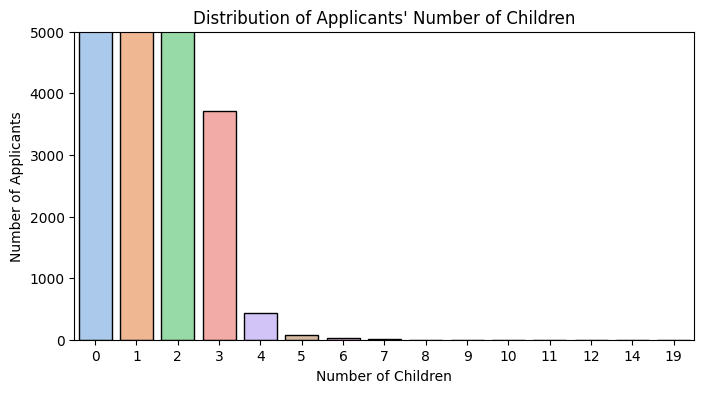

In [86]:
plt.figure(figsize=(8, 4))
sns.countplot(x="CNT_CHILDREN", data=data_train, hue="CNT_CHILDREN", edgecolor='black', palette="pastel", legend=False)
plt.title("Distribution of Applicants' Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Number of Applicants")
plt.ylim(0, 5000)
plt.show()

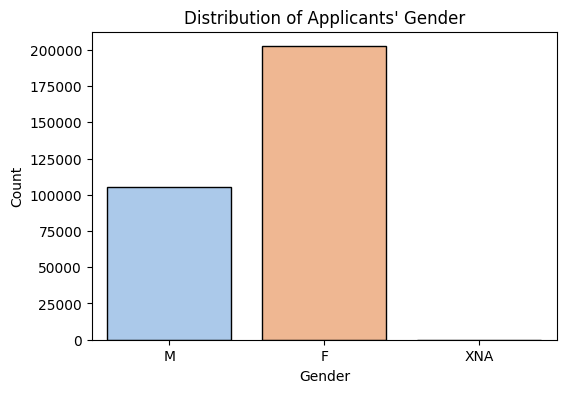

In [87]:
plt.figure(figsize=(6, 4))
sns.countplot(x="CODE_GENDER", data=data_train, hue="CODE_GENDER", edgecolor='black', palette="pastel", legend=False)
plt.title("Distribution of Applicants' Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

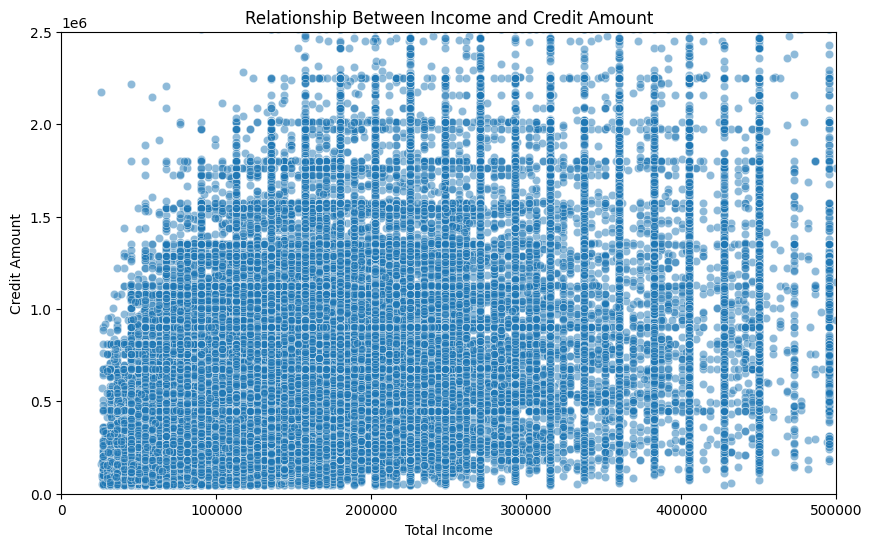

In [88]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_train["AMT_INCOME_TOTAL"], y=data_train["AMT_CREDIT"], alpha=0.5)
plt.title("Relationship Between Income and Credit Amount")
plt.xlabel("Total Income")
plt.ylabel("Credit Amount")
plt.xlim(0, 500000)
plt.ylim(0, 2500000)
plt.show()

# **Data Processing**

## **K-Means Clustering**

In [89]:
def clustering_with_elbow(data, features_columns, K_range=(1, 11), optimal_k=3):

    features = data[features_columns].copy()

    inertia = []

    for k in range(*K_range):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(features)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(range(*K_range), inertia, marker='o', linestyle='-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method to Determine Optimal K')
    plt.show()

    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    data['Cluster'] = kmeans.fit_predict(features)

    return data

Elbow Method Application Test


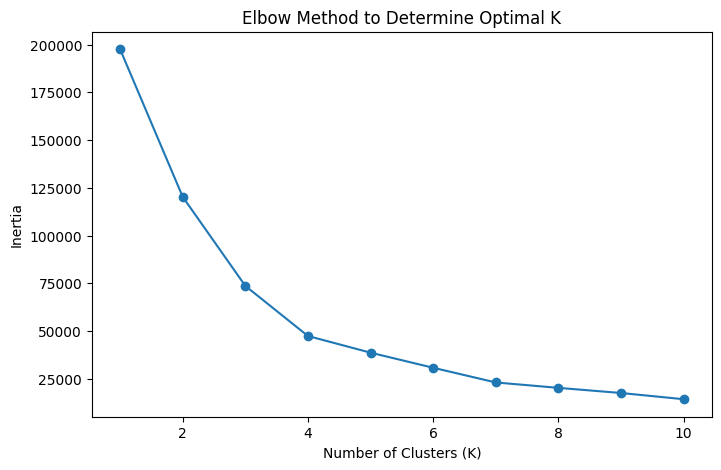

In [90]:
print("Elbow Method Application Test")
result_data_test = clustering_with_elbow(data_test_encoded, ['AMT_INCOME_TOTAL_BINNED', 'AMT_CREDIT_BINNED'])

Elbow Method Application Train


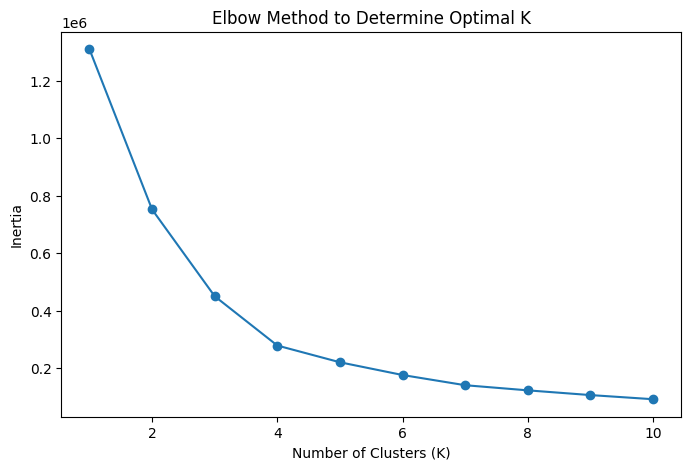

In [91]:
print("Elbow Method Application Train")
result_data_train = clustering_with_elbow(data_train_encoded, ['AMT_INCOME_TOTAL_BINNED', 'AMT_CREDIT_BINNED'])

In [92]:
print("Cluster Data Application Test")
print(result_data_test[['AMT_INCOME_TOTAL_BINNED', 'AMT_CREDIT_BINNED', 'Cluster']].head())

Cluster Data Application Test
   AMT_INCOME_TOTAL_BINNED  AMT_CREDIT_BINNED  Cluster
0                        1                  0        0
1                        4                  4        2
2                        0                  0        0
3                        3                  3        2
4                        2                  0        1


In [93]:
print("Cluster Data Application Train")
print(result_data_train[['AMT_INCOME_TOTAL_BINNED', 'AMT_CREDIT_BINNED', 'Cluster']].head())

Cluster Data Application Train
   AMT_INCOME_TOTAL_BINNED  AMT_CREDIT_BINNED  Cluster
0                        0                  1        1
1                        3                  3        2
2                        4                  4        2
3                        1                  1        1
4                        1                  2        0


Cluster Characteristics

In [94]:
print("Total Cluster Application Test")
print(result_data_test['Cluster'].value_counts())

Total Cluster Application Test
Cluster
0    18023
1    16876
2    13845
Name: count, dtype: int64


In [95]:
print("Total Cluster Application Train")
print(result_data_train['Cluster'].value_counts())

Total Cluster Application Train
Cluster
0    114647
2     98532
1     94332
Name: count, dtype: int64


In [96]:
print("Average Cluster Application Test")
print(result_data_test.groupby('Cluster')[['AMT_INCOME_TOTAL_BINNED', 'AMT_CREDIT_BINNED']].mean())

Average Cluster Application Test
         AMT_INCOME_TOTAL_BINNED  AMT_CREDIT_BINNED
Cluster                                            
0                       0.693336           1.881318
1                       3.175930           0.854349
2                       3.137234           3.530733


In [97]:
print("Average Cluster Application Train")
print(result_data_train.groupby('Cluster')[['AMT_INCOME_TOTAL_BINNED', 'AMT_CREDIT_BINNED']].mean())

Average Cluster Application Train
         AMT_INCOME_TOTAL_BINNED  AMT_CREDIT_BINNED
Cluster                                            
0                       0.784687           2.937713
1                       1.096881           0.411599
2                       3.646196           2.456167


In [98]:
def plot_cluster_characteristics(result_data, features, cluster_col='Cluster'):
    plt.figure(figsize=(12, 10))

    for i, feature in enumerate(features, 1):
        plt.subplot(2, 2, i)
        cluster_means = result_data.groupby(cluster_col)[feature].mean()

        sns.barplot(x=cluster_means.index, y=cluster_means.values, hue=cluster_means.index, palette='pastel', legend=False)
        plt.axhline(result_data[feature].mean(), color='red', linestyle='--', label='Overall Mean')
        plt.axhline(result_data[feature].median(), color='blue', linestyle='-.', label='Overall Median')

        plt.xlabel('Cluster')
        plt.ylabel(f'Average {feature}')
        plt.title(f'Average {feature} by Cluster')
        plt.legend()

    plt.tight_layout()
    plt.show()

Cluster Characteristics Application Test


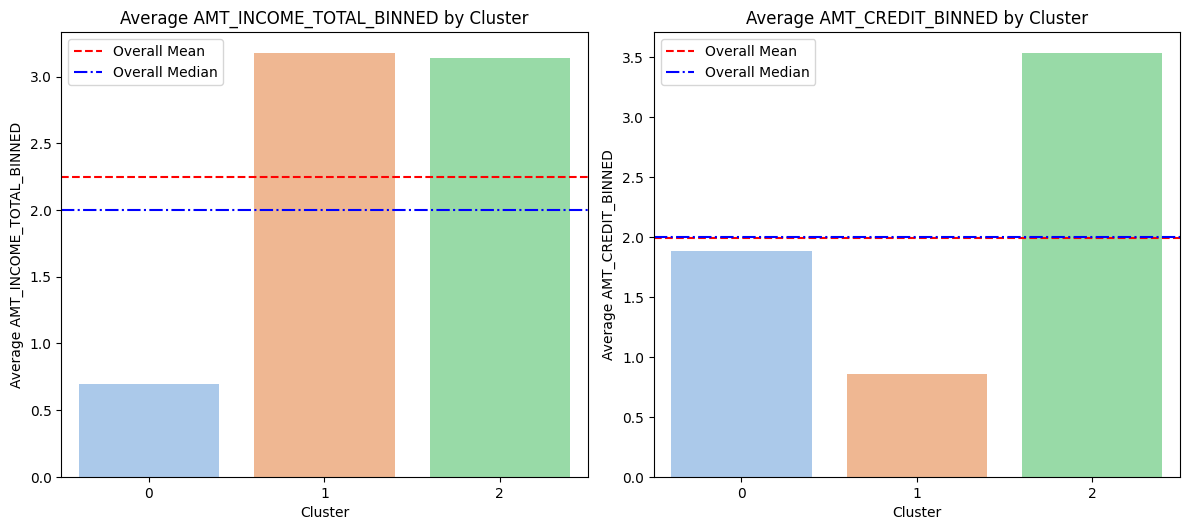

In [99]:
print("Cluster Characteristics Application Test")
plot_cluster_characteristics(result_data_test, ['AMT_INCOME_TOTAL_BINNED', 'AMT_CREDIT_BINNED'])

Cluster Characteristics Application Train


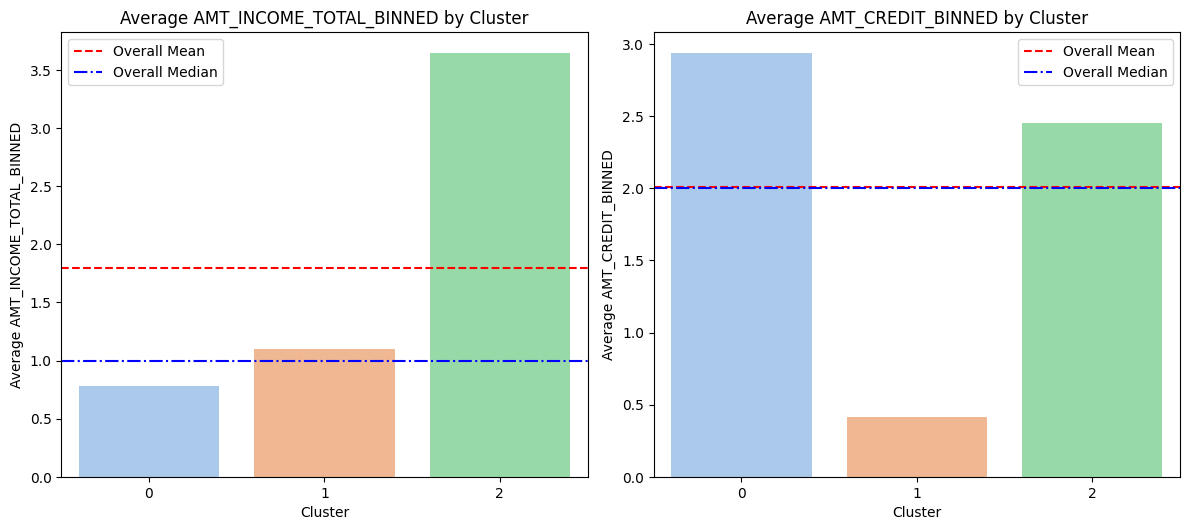

In [100]:
print("Cluster Characteristics Application Train")
plot_cluster_characteristics(result_data_train, ['AMT_INCOME_TOTAL_BINNED', 'AMT_CREDIT_BINNED'])

## **Modeling**

Train and Test Data

In [101]:
X = result_data_train.drop(['SK_ID_CURR','TARGET'], axis=1)
y = result_data_train['TARGET']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [103]:
test_x_predict = data_test_copy.drop(['SK_ID_CURR'], axis=1)

Logistic Regression Model

In [104]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr}')

Logistic Regression Accuracy: 0.9197962139950138


In [105]:
y_pred_test_lr = lr.predict(test_x_predict)

print("Hasil Prediksi pada Dataset Test:")
print(y_pred_test_lr)

Hasil Prediksi pada Dataset Test:
[0. 0. 0. ... 0. 0. 0.]


XGBoost Model

In [106]:
xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb}')

XGBoost Accuracy: 0.9195597118615674


In [107]:
y_pred_test_xgb = xgb.predict(test_x_predict)
print("Hasil Prediksi pada Dataset Test:")
print(y_pred_test_xgb)

Hasil Prediksi pada Dataset Test:
[0 0 0 ... 0 0 0]


Random Forest Model

In [108]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')

Random Forest Accuracy: 0.9200622788951409


In [109]:
y_pred_test_rf = rf.predict(test_x_predict)
print("Hasil Prediksi pada Dataset Test:")
print(y_pred_test_rf)

Hasil Prediksi pada Dataset Test:
[0. 0. 0. ... 0. 0. 0.]


# **Evaluation**

Logistic Regression Model

In [110]:
report_lr = classification_report(y_test, y_pred_lr)
print("Classification Report Logistic Regression :")
print(report_lr)

Classification Report Logistic Regression :
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     93362
         1.0       0.43      0.01      0.02      8117

    accuracy                           0.92    101479
   macro avg       0.68      0.50      0.49    101479
weighted avg       0.88      0.92      0.88    101479



In [111]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix Logistic Regression:")
print(conf_matrix_lr)

Confusion Matrix Logistic Regression:
[[93270    92]
 [ 8047    70]]


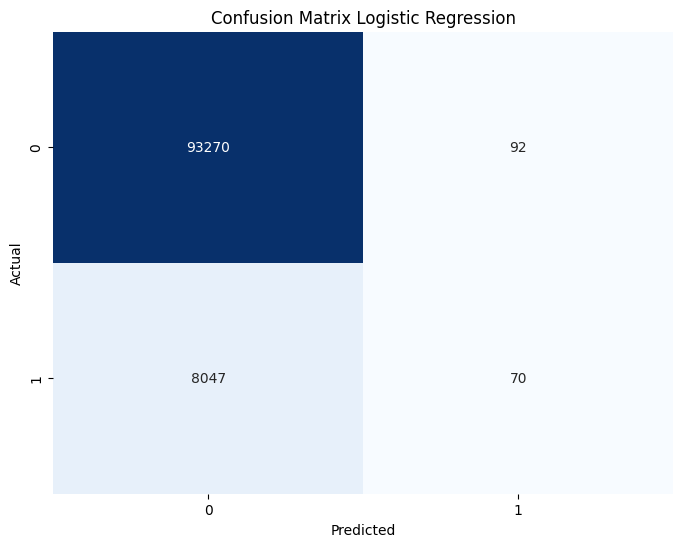

In [112]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

XGBoost Model

In [113]:
report_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report XGBoost :")
print(report_xgb)

Classification Report XGBoost :
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     93362
         1.0       0.46      0.03      0.06      8117

    accuracy                           0.92    101479
   macro avg       0.69      0.51      0.51    101479
weighted avg       0.89      0.92      0.89    101479



In [114]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix XGBoost :")
print(conf_matrix_xgb)

Confusion Matrix XGBoost :
[[93060   302]
 [ 7861   256]]


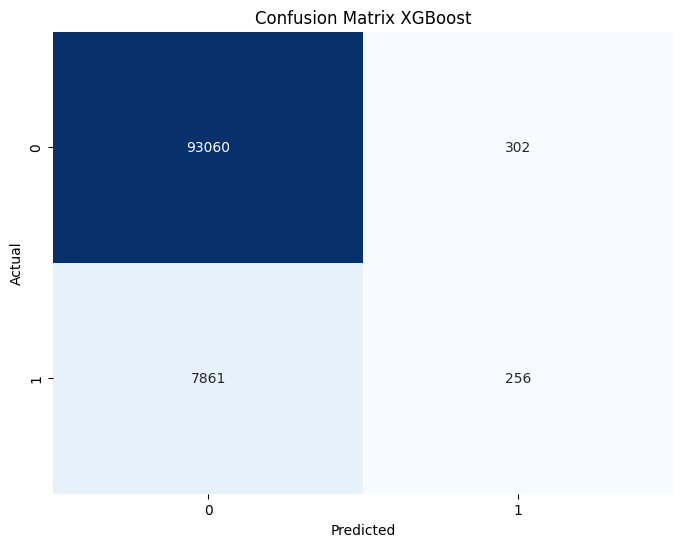

In [115]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix XGBoost')
plt.show()

Random Forest

In [116]:
report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report Random Forest :")
print(report_rf)

Classification Report Random Forest :
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     93362
         1.0       0.56      0.00      0.01      8117

    accuracy                           0.92    101479
   macro avg       0.74      0.50      0.48    101479
weighted avg       0.89      0.92      0.88    101479



In [117]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix Random Forest :")
print(conf_matrix_rf)

Confusion Matrix Random Forest :
[[93342    20]
 [ 8092    25]]


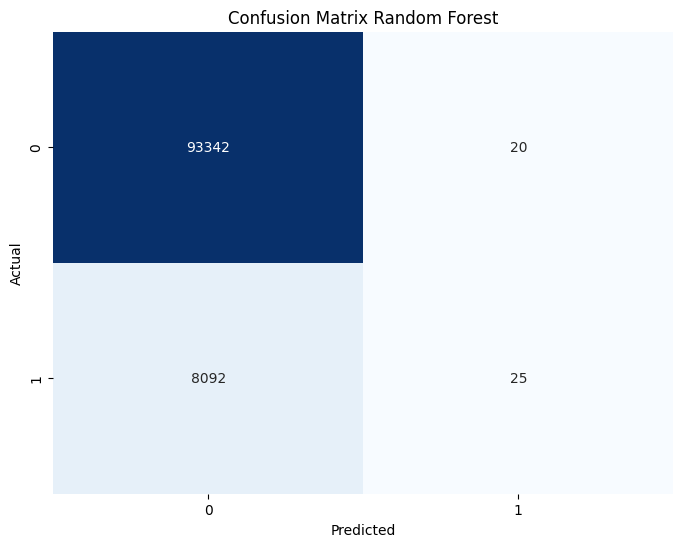

In [118]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Random Forest')
plt.show()

# **Result**

In [119]:
results = {"Models": ["Logistic Regression", "XGBoost", "Random Forest"],
           "Accuracy": [accuracy_lr, accuracy_xgb, accuracy_rf]}

for (key, value) in results.items():
    if key=="Accuracy":
        results[key]=  [item*100 for item in results[key]]


result_data=pd.DataFrame(results)

In [120]:
result_data

,Models,Accuracy
0,Logistic Regression,91.979621
1,XGBoost,91.955971
2,Random Forest,92.006228


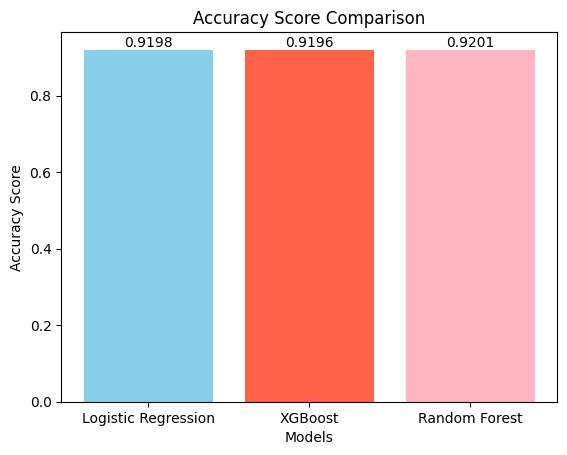

In [121]:
models = ['Logistic Regression', 'XGBoost', 'Random Forest']
accuracy = [accuracy_lr, accuracy_xgb, accuracy_rf]
colors = ['red','green','orange']

plt.title('Accuracy Score Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
colors = ['skyblue', 'tomato', 'lightpink']
plt.bar(models, accuracy, color=colors)

for i in range(len(models)):
    plt.text(models[i], accuracy[i], str(round(accuracy[i], 4)), ha='center', va='bottom')

plt.show()

# **Final Data**

In [122]:
final_data = pd.DataFrame({'SK_ID_CURR': data_test['SK_ID_CURR'], 'TARGET': y_pred_test_lr })
final_data.to_csv("final_data.csv", index = False)
final_data

,SK_ID_CURR,TARGET
0,100001,0.0
1,100005,0.0
2,100013,0.0
3,100028,0.0
4,100038,0.0
...,...,...
48739,456221,0.0
48740,456222,0.0
48741,456223,0.0
48742,456224,0.0
